In [ ]:
import os
import ast
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from pathlib import Path

pd.options.display.max_rows = 20
sns.set(style="darkgrid")
%matplotlib inline

In [ ]:
!pip install -q magenta
from magenta.models.sketch_rnn.sketch_rnn_train import *
from magenta.models.sketch_rnn.model import *
from magenta.models.sketch_rnn.utils import *
from magenta.models.sketch_rnn.rnn import *

     |████████████████████████████████| 1.4 MB 5.3 MB/s 
     |████████████████████████████████| 352 kB 48.0 MB/s 
     |████████████████████████████████| 5.6 MB 30.2 MB/s 
     |████████████████████████████████| 69 kB 7.1 MB/s 
     |████████████████████████████████| 204 kB 47.6 MB/s 
     |████████████████████████████████| 3.6 MB 31.4 MB/s 
     |████████████████████████████████| 87 kB 6.8 MB/s 
     |████████████████████████████████| 254 kB 45.2 MB/s 
     |████████████████████████████████| 1.4 MB 35.7 MB/s 
     |████████████████████████████████| 1.6 MB 34.3 MB/s 
     |████████████████████████████████| 2.3 MB 32.6 MB/s 
     |████████████████████████████████| 210 kB 44.6 MB/s 
     |████████████████████████████████| 20.2 MB 1.5 MB/s 
     |████████████████████████████████| 79 kB 7.3 MB/s 
     |████████████████████████████████| 367 kB 50.9 MB/s 
     |████████████████████████████████| 981 kB 46.2 MB/s 
     |████████████████████████████████| 366 kB 46.0 MB/s 
     |███████████████

/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/usr/local/lib/python3.7/dist-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/My Drive/CMPM146 Final Project/Data/Bitmaps/Limited/"
# data_dir = "/content/drive/Shared with me/CMPM146 Final Project/Data/Bitmaps/Limited/"
!ls "/content/drive/My Drive/CMPM146 Final Project/Data/Bitmaps/Limited/"
# !ls "/content/drive/Shared with me/CMPM146 Final Project/Data/Bitmaps/Limited/"

 backpack.npy	     circle.npy		'garden hose.npy'   map.npy
 banana.npy	     clock.npy		 hammer.npy	    megaphone.npy
 bandage.npy	     compass.npy	 hand.npy	    octagon.npy
'baseball bat.npy'   computer.npy	 helicopter.npy     pencil.npy
 bicycle.npy	     cow.npy		 helmet.npy	   'power outlet.npy'
 binoculars.npy      eyeglasses.npy	 hexagon.npy	    rifle.npy
 book.npy	     eye.npy		 hourglass.npy	    saw.npy
 broom.npy	    'fire hydrant.npy'	 house.npy	    shovel.npy
 bucket.npy	     firetruck.npy	 knife.npy	    square.npy
 calculator.npy      fish.npy		 ladder.npy	    umbrella.npy
 car.npy	     flashlight.npy	 laptop.npy	    wristwatch.npy
 cat.npy	     fork.npy		 leaf.npy


### Download the data

In [ ]:
items = ['cat', 'cow', 'fish', 'hexagon', 'house', 'clock', 'eye', 'hand', 'hourglass', 'leaf']
# items = ['hexagon', 'clock']
all_items = []
label_dict = {}

In [ ]:
# x_train = x_test = x_valid = y_train = y_test = y_valid = []
test_data = []
test_label = ''
include_all = True
def load_data():
  global test_data
  global test_label
  # !nvidia-smi
  x = y = item = item_labels = []
  first = True
  count = 0
  entries_per_item = 10000
  for filename in os.listdir(data_dir):
    # print(filename)
    if filename.endswith(".npy"):
      # itemname = filename[0:filename.index('.npz')]
      if "full" not in filename:
        
        itemname = filename[0:filename.index('.npy')]
        all_items.append(itemname)
        print("added:", itemname)
        if (itemname in items) or include_all:
          path = data_dir + filename
          # print("path:", path)
          item = np.load(path)
          item = item.astype('float32') / 255.
          item = item[0:entries_per_item, :]
          if itemname == 'eye':
            test_data = item[0]
            test_label = count
          item_labels = [count for _ in range(entries_per_item)]
          label_dict[count] = itemname
          count += 1
          item_labels = np.array(item_labels).astype('float32')
          item_labels = item_labels.reshape(item_labels.shape[0], 1)
          if not first:
            x = np.concatenate((x, item), axis=0)
            y = np.concatenate((y, item_labels), axis=0)
          else:
            x = item
            y = item_labels
            first = False
  return x, y

In [ ]:
def get_item(itemname, idx):
  filename = data_dir + itemname + '.npy'
  my_file = Path(filename)
  if my_file.is_file():
    item = np.load(filename)
    item = item.astype('float32') / 255.
    print('item base shape:', np.shape(item))
    # item = item[0:50000, :]
    item_class = list(label_dict.keys())[list(label_dict.values()).index(itemname)]
    return item[idx], item_class
    # file exists
  else: 
    print("file for item not found:", itemname)

In [ ]:
features, labels = load_data()
features = np.array(features, dtype='float32')
labels = np.array(labels, dtype='float32')
# features=features.reshape(features.shape[0]*features.shape[1],features.shape[2])
# labels=labels.reshape(labels.shape[0]*labels.shape[1],labels.shape[2])
print("features shape:", np.shape(features))
print("labels shape:", np.shape(labels))
# print("test data:", test_data)
print(items)
print("test data:", np.shape(test_data))
print("test label:", test_label)
# print("num categories:", i)
# print("all items:", all_items)
# print("valid_items:", valid_items)
print("label_dict:", label_dict)
with open("label_dict.pickle", "wb") as f:
    pickle.dump(label_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

label_dict_path = "/content/drive/My Drive/CMPM146 Final Project/Models/label_dict.pickle"
with open(label_dict_path, "wb") as f:
    pickle.dump(label_dict, f, protocol=pickle.HIGHEST_PROTOCOL)

# test picle load
with open('label_dict.pickle', 'rb') as handle:
    labels_unpickled = pickle.load(handle)

print(label_dict == labels_unpickled)

added: banana
added: backpack
added: baseball bat
added: bandage
added: book
added: binoculars
added: bicycle
added: bucket
added: cat
added: broom
added: clock
added: circle
added: computer
added: calculator
added: compass
added: eye
added: car
added: eyeglasses
added: fish
added: garden hose
added: fire hydrant
added: fork
added: hammer
added: flashlight
added: firetruck
added: helicopter
added: helmet
added: house
added: hourglass
added: hexagon
added: hand
added: leaf
added: ladder
added: laptop
added: megaphone
added: map
added: knife
added: octagon
added: pencil
added: power outlet
added: saw
added: shovel
added: rifle
added: square
added: umbrella
added: wristwatch
added: cow
features shape: (470000, 784)
labels shape: (470000, 1)
['cat', 'cow', 'fish', 'hexagon', 'house', 'clock', 'eye', 'hand', 'hourglass', 'leaf']
test data: (784,)
test label: 15
label_dict: {0: 'banana', 1: 'backpack', 2: 'baseball bat', 3: 'bandage', 4: 'book', 5: 'binoculars', 6: 'bicycle', 7: 'bucket', 8:

In [ ]:
with open(label_dict_path, 'rb') as handle:
    label_dict = pickle.load(handle)

NameError: ignored

In [ ]:
label_dict_path = "/content/drive/My Drive/CMPM146 Final Project/Models/label_dict.pickle"
with open(label_dict_path, 'rb') as handle:
    label_dict = pickle.load(handle)

### Simple

In [ ]:
!pip install tensorflow==2.1.0
!pip install np_utils
!pip install h5py==2.10.0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras as keras
# import tensorflow.keras
from tensorflow.keras.layers import Dense,Flatten, Conv2D
from tensorflow.keras.layers import MaxPooling2D, Dropout
# from keras.utils import np_utils, print_summary
import h5py
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import pickle
from tensorflow.keras.callbacks import TensorBoard
import cv2

In [ ]:
print(tf.__version__)
print(keras.__version__)
print(h5py.__version__)
# print(tensorflow-estimator.__version__)

2.7.0
2.7.0
3.1.0


In [ ]:
def keras_model(image_x, image_y):
    num_of_classes = len(label_dict)
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(image_x,image_y,1), activation='relu'))
    model.add(Conv2D(32, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Dropout(0.25))
    
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
    model.add(Conv2D(64, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_of_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])
    filepath = "QuickDraw.h5"
    # checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
    es = EarlyStopping(monitor='val_acc', verbose=1,
                   patience=6, restore_best_weights=True)
    # callbacks_list = [checkpoint]
    callbacks_list = [es]

    return model, callbacks_list

In [ ]:
# def transfer_model2(image_x, image_y):
#     num_of_classes = len(label_dict)
#     model = Sequential()
#     model.add(Conv2D(32, (5, 5), input_shape=(image_x,image_y,1), activation='relu'))
#     model.add(Conv2D(32, (5, 5), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
#     model.add(Dropout(0.25))
    
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))
#     model.add(Conv2D(64, (5, 5), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='same'))

#     model.add(Flatten())
#     model.add(Dense(512, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(num_of_classes, activation='softmax'))

#     model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])
#     filepath = "QuickDraw.h5"
#     # checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=0, save_best_only=True, mode='max')
#     es = EarlyStopping(monitor='val_acc', verbose=1,
#                    patience=6, restore_best_weights=True)
#     # callbacks_list = [checkpoint]
#     callbacks_list = [es]

#     return model, callbacks_list

In [ ]:
def prepress_labels(labels):
    labels = to_categorical(labels)
    return labels

In [ ]:
# features, labels = load_data()
print("num items:", len(label_dict))
features = np.array(features, dtype='float32')
labels = np.array(labels, dtype='float32')
features, labels = shuffle(features, labels)
labels=prepress_labels(labels)
train_x, test_x, train_y, test_y = train_test_split(features, labels, random_state=0,
                                                    test_size=0.1)
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
model, callbacks_list = keras_model(28,28)
# print_summary(model)
model.summary()

num items: 47
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 1, 1, 64)          51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 

In [ ]:
# model_save_dir = "/content/drive/My Drive/CMPM146 Final Project/Models/QuickDraw5.h5"

In [ ]:
epochs = 30
model.fit(train_x, train_y, validation_data=(test_x, test_y), epochs=epochs, batch_size=64,
          callbacks=callbacks_list.append(TensorBoard(log_dir="QuickDraw")), verbose=1)
model.save('QuickDraw.h5')
model_save_dir = "/content/drive/My Drive/CMPM146 Final Project/Models/QuickDraw5.h5"
# model_save_dir = "/content/drive/Shared with me/CMPM146 Final Project/Models/QuickDraw5.h5"
model.save(model_save_dir, save_format='h5')


Train on 423000 samples, validate on 47000 samples
Epoch 1/40
423000/423000 [==============================] - 71s 169us/sample - loss: 1.3021 - acc: 0.6505 - val_loss: 0.8352 - val_acc: 0.7805
Epoch 2/40
423000/423000 [==============================] - 65s 155us/sample - loss: 0.9189 - acc: 0.7631 - val_loss: 0.7279 - val_acc: 0.8059
Epoch 3/40
423000/423000 [==============================] - 66s 157us/sample - loss: 0.8473 - acc: 0.7831 - val_loss: 0.6955 - val_acc: 0.8127
Epoch 4/40
423000/423000 [==============================] - 66s 157us/sample - loss: 0.8106 - acc: 0.7930 - val_loss: 0.6556 - val_acc: 0.8255
Epoch 5/40
423000/423000 [==============================] - 67s 158us/sample - loss: 0.7900 - acc: 0.7990 - val_loss: 0.6609 - val_acc: 0.8229
Epoch 6/40
423000/423000 [==============================] - 65s 154us/sample - loss: 0.7765 - acc: 0.8023 - val_loss: 0.6567 - val_acc: 0.8264
Epoch 7/40
423000/423000 [==============================] - 66s 156us/sample - loss: 0.7639

In [ ]:
# model.save('QuickDraw.h5')
# model_save_dir = "/content/drive/My Drive/CMPM146 Final Project/Models/QuickDraw5.h5"
# model.save(model_save_dir, save_format='h5')

In [ ]:
def keras_process_image(img):
    image_x = 28
    image_y = 28
    img = cv2.resize(img, (image_x, image_y))
    img = np.array(img, dtype=np.float32)
    img = np.reshape(img, (-1, image_x, image_y, 1))
    return img

In [ ]:
top_k = 10
def keras_predict(model, image):
    processed = keras_process_image(image)
    # print("processed: " + str(processed.shape))
    preds = model.predict(processed)[0]
    # pred_probab = model.predict(processed)[0]
    # topIndices = np.argpartition(preds, -1*top_k)[-1*top_k:]
    # topIndices[np.argsort(preds[ind])]
    topIndices = (-preds).argsort()[:top_k]
    # print("preds:", preds)
    # print("preds[0]", preds[0])
    # print("indices:", topIndices)
    # pred_class = list(pred_probab).index(max(pred_probab))
    # return max(pred_probab), pred_class
    # print(preds)
    return topIndices, preds

Predict On test data

In [ ]:
model_save_dir = "/content/drive/My Drive/CMPM146 Final Project/Models/QuickDraw5.h5"
model = tf.keras.models.load_model(model_save_dir)
# model = tf.keras.models.load_model('QuickDraw.h5')
# score, acc = model.evaluate(test_x, test_y, verbose = 1)

In [ ]:
# pred_probab, pred_class = keras_predict(model, test_data)
preds, probs = keras_predict(model, test_data)
# pred_classes = [label_dict[i] for i in range(top_k)]
pred_classes = []
for idx in preds:
  # print(label_dict[idx])
  pred_classes.append(label_dict[idx])
print("top labels:", pred_classes)
pred_class = preds[0]
print("prob:", probs[pred_class], "label:", pred_class)
print("Correct label was:", test_label, label_dict[test_label])
print("Match: ", test_label == pred_class)

top labels: ['rifle', 'pencil', 'garden hose', 'knife', 'ladder', 'fire hydrant', 'bandage', 'laptop', 'wristwatch', 'baseball bat']
prob: 0.17287056 label: 42
Correct label was: 15 eye
Match:  False


Standalone prediction demonstration

In [ ]:
# Takes in a grayscale 28x28 image (or size 784) and returns 
# a pair label, class_num that is the models prediction for that input data
def predict(img):
  # load_model = tf.keras.models.load_model('QuickDraw.h5')
  load_model = tf.keras.models.load_model(model_save_dir)
  # load_model.summary()
  preds, probs = keras_predict(model, test_data)
  print(probs)
  pred_class = preds[0]
  # pred_probab, pred_class = keras_predict(model, test_data)
  print("Predicted class:", pred_class, "probability:", probs[pred_class])
  return pred_class, label_dict[pred_class]


In [ ]:
pred_class, label = predict(test_data)
print('Predicted label:', label + ', ', "class:", pred_class)

[0.01151847 0.0050349  0.02292277 0.02836594 0.0140031  0.01315153
 0.00182685 0.00454412 0.00347492 0.0209852  0.00101916 0.00251292
 0.01235675 0.00586941 0.00620881 0.00252851 0.00615053 0.0130785
 0.00291254 0.07855823 0.03174485 0.01976155 0.01908302 0.01681131
 0.01128912 0.01881279 0.00662363 0.00696314 0.00735108 0.00887705
 0.00647851 0.01292185 0.04439755 0.02536886 0.01478962 0.00960225
 0.07479897 0.01008133 0.12003033 0.02125972 0.01518746 0.01177618
 0.17287056 0.02186818 0.00227727 0.02531067 0.00664003]
Predicted class: 42 probability: 0.17287056
Predicted label: rifle,  class: 42


(28, 28)


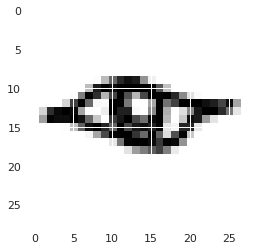

In [ ]:
test_img = np.reshape(test_data, (28, 28))
print(np.shape(test_img))
matplotlib.image.imsave('test.png', test_img)
matplotlib.pyplot.imshow(test_img, cmap='binary')

Get a test item from the dataset, run prediction on it. Displays image, correct label, and predicted label

item base shape: (127609, 784)
14 compass
(28, 28)
CPU times: user 50.8 ms, sys: 3.79 ms, total: 54.6 ms
Wall time: 52.9 ms
top labels: ['garden hose', 'baseball bat', 'laptop', 'rifle', 'computer', 'pencil', 'fire hydrant', 'knife', 'hammer', 'shovel']
prob: 0.21258721 label: 19
Correct label was: 14 compass
Match:  False


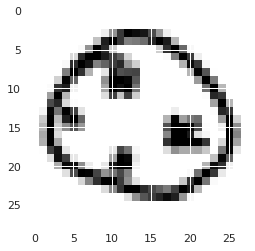

In [ ]:
test_item, test_item_class = get_item('compass', 23)
print(test_item_class, label_dict[test_item_class])
test_img = np.reshape(test_item, (28, 28))
print(np.shape(test_img))
# matplotlib.image.imsave('test.png', test_img)
matplotlib.pyplot.imshow(test_img, cmap='binary')
%time preds, probs = keras_predict(model, test_item)
# pred_classes = [label_dict[i] for i in range(top_k)]
pred_classes = []
for idx in preds:
  # print(label_dict[idx])
  pred_classes.append(label_dict[idx])
print("top labels:", pred_classes)
pred_class = preds[0]
print("prob:", probs[pred_class], "label:", pred_class)
print("Correct label was:", test_item_class, label_dict[test_item_class])
print("Match: ", test_item_class == pred_class)
# pred_class, label = predict(test_data)
# print('Predicted label:', label + ', ', "class:", pred_class)
